<a href="https://colab.research.google.com/github/Gilnanderson/metricas_de_avaliacao_ML/blob/main/metricas_de_avaliacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = "/content/drive/My Drive/datasets/cachorros/"

In [5]:
base_dir = '/content/drive/My Drive/datasets/cachorros/'  # Caminho no seu Google Drive

# Configuração dos geradores de dados
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Separar 20% para validação
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'  # Dados de treinamento
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Dados de validação
)

Found 256 images belonging to 2 classes.
Found 62 images belonging to 2 classes.


In [6]:
# Carregar o modelo VGG16 pré-treinado, excluindo as camadas superiores
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Congelar os pesos do modelo base
for layer in base_model.layers:
    layer.trainable = False

# Construir o modelo
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Saída binária (Capitu/Weiss)
])

# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [7]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator
)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 230s 9s/step - accuracy: 0.5940 - loss: 0.9767 - val_accuracy: 0.6613 - val_loss: 0.8268
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.8655 - loss: 0.2984 - val_accuracy: 0.6774 - val_loss: 1.0125
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 33s 810ms/step - accuracy: 0.9284 - loss: 0.2699 - val_accuracy: 0.7097 - val_loss: 0.9503
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.9287 - loss: 0.2020 - val_accuracy: 0.6129 - val_loss: 1.5152
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 32s 934ms/step - accuracy: 0.9060 - loss: 0.1917 - val_accuracy: 0.8387 - val_loss: 0.5428
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.9180 - loss: 0.2003 - val_accuracy: 0.7097 - val_loss: 0.9934
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.9583 - loss: 0.1266 - val_accuracy: 0.6774 - val_loss: 1.2888
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9545 - loss: 0.1204 - val_accuracy: 0.7903 - val_loss: 0.7253
Epoch 9/15
8

In [8]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Obter previsões do modelo para os dados de validação
validation_generator.reset()  # Garante que o gerador esteja na posição inicial
y_pred = model.predict(validation_generator)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()  # Converter probabilidades em classes binárias (0 ou 1)

# Obter rótulos reais dos dados de validação
y_true = validation_generator.classes

# Construir a matriz de confusão
cm = confusion_matrix(y_true, y_pred_classes)

# Extrair VP, VN, FP, FN da matriz de confusão
VP = cm[1, 1]  # Verdadeiros Positivos
VN = cm[0, 0]  # Verdadeiros Negativos
FP = cm[0, 1]  # Falsos Positivos
FN = cm[1, 0]  # Falsos Negativos

# Funções para cálculo das métricas
def calcular_acuracia(VP, VN, FP, FN):
    return (VP + VN) / (VP + VN + FP + FN)

def calcular_sensibilidade(VP, FN):
    return VP / (VP + FN)

def calcular_especificidade(VN, FP):
    return VN / (VN + FP)

def calcular_precisao(VP, FP):
    return VP / (VP + FP)

def calcular_fscore(precision, recall):
    return 2 * (precision * recall) / (precision + recall)

# Cálculo das métricas
acuracia = calcular_acuracia(VP, VN, FP, FN)
sensibilidade = calcular_sensibilidade(VP, FN)
especificidade = calcular_especificidade(VN, FP)
precisao = calcular_precisao(VP, FP)
fscore = calcular_fscore(precisao, sensibilidade)

# Exibindo os resultados
print(f"Matriz de Confusão:\n{cm}")
print(f"Acurácia: {acuracia:.2f}")
print(f"Sensibilidade (Recall): {sensibilidade:.2f}")
print(f"Especificidade: {especificidade:.2f}")
print(f"Precisão: {precisao:.2f}")
print(f"F-Score: {fscore:.2f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step
Matriz de Confusão:
[[26  3]
 [24  9]]
Acurácia: 0.56
Sensibilidade (Recall): 0.27
Especificidade: 0.90
Precisão: 0.75
F-Score: 0.40


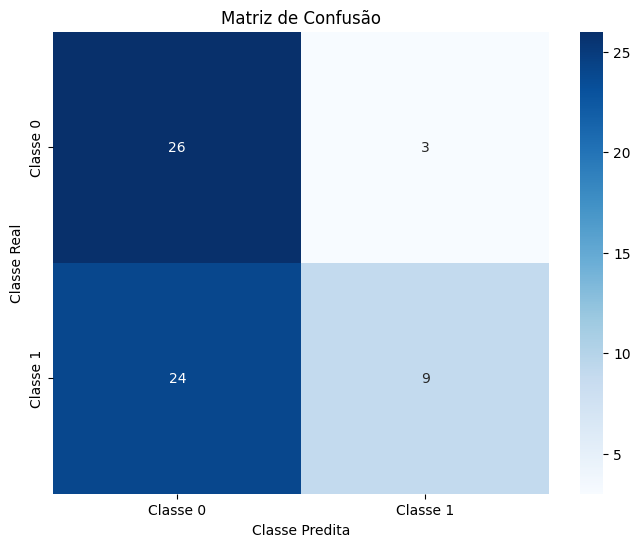

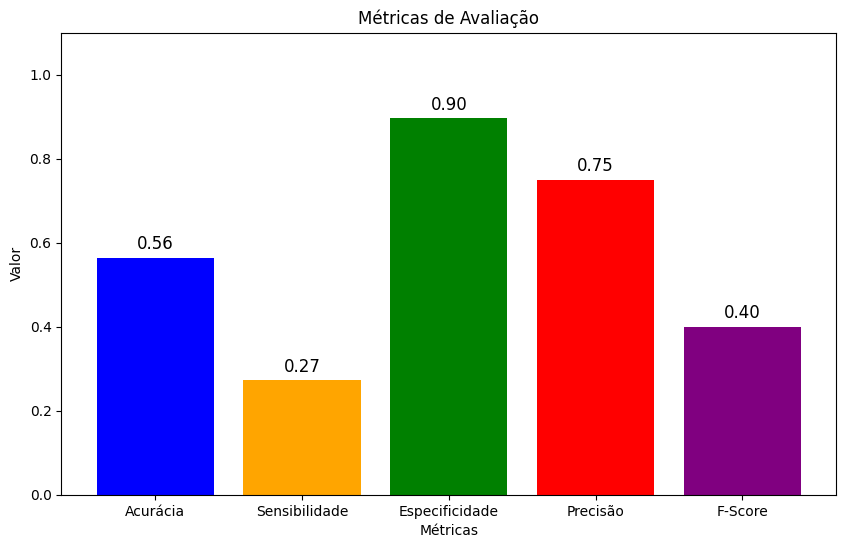

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exibindo a matriz de confusão como gráfico de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.title("Matriz de Confusão")
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.show()

# Dados para o gráfico de barras
metricas = ['Acurácia', 'Sensibilidade', 'Especificidade', 'Precisão', 'F-Score']
valores = [acuracia, sensibilidade, especificidade, precisao, fscore]

# Exibindo o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(metricas, valores, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.ylim(0, 1.1)  # Limite para facilitar a visualização
plt.title("Métricas de Avaliação")
plt.ylabel("Valor")
plt.xlabel("Métricas")
for i, v in enumerate(valores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)  # Adicionar os valores acima das barras
plt.show()

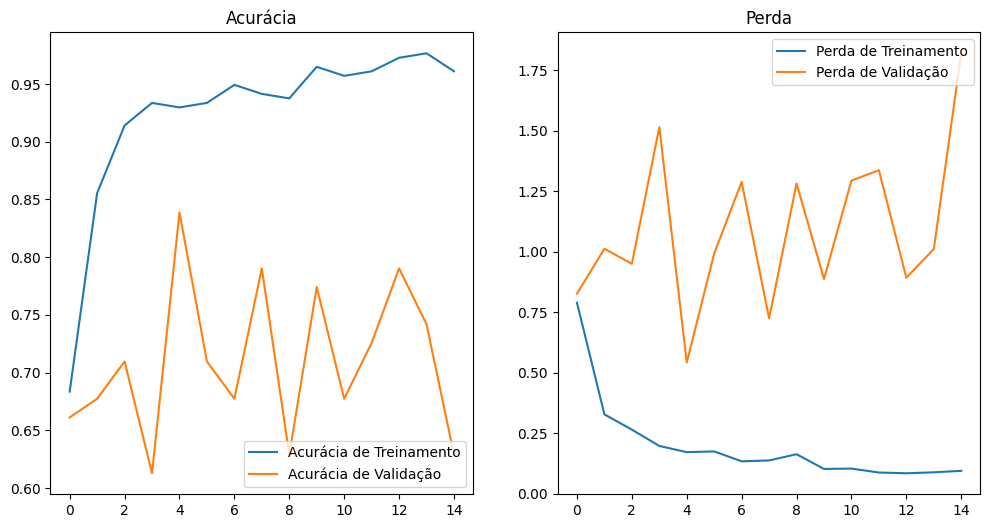

In [9]:
# Gráficos de acurácia e perda
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treinamento')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perda de Treinamento')
plt.plot(epochs_range, val_loss, label='Perda de Validação')
plt.legend(loc='upper right')
plt.title('Perda')
plt.show()

In [13]:
model.save('capitu_vs_weiss_metricas_de_avaliacao.keras')